In [1]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras import models 
from tensorflow.keras.layers import Dense, Dropout

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

In [2]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = 'ThoraricSurgery.csv'

# 준비된 수술 환자 데이터를 불러들입니다.
Data_set = np.loadtxt(my_data, delimiter=",")

Data_set

Saving ThoraricSurgery.csv to ThoraricSurgery.csv


array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

### 폴란드의 브로츠와프 의과대학에서 공개한 폐암 수술환자의 
### 수술 전 진단 데이터와 수술후 생존 결과를 기록한 실제 의료기록 데이터

#### 각 줄 마다 다른 환자의 상태가 기록되어 있으며,
#### 종양의 유형, 폐활량, 호흡 곤란 여부, 고통 정도, 기침, 흡연, 천식 여부 등 17가지의 환자 상태로 속성에 해당한다.
#### 마지막 열은 수술 후 생존결과로 1은 수술 후 생존했음을 0은 사망했음을 의미하는 클래스이다.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.
X = Data_set[:,0:17]
Y = Data_set[:,17]

# 훈련 데이터와 테스트 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
print(X_train.shape)

(329, 17)


In [ ]:
original = models.Sequential()
original.add(Dense(32, input_dim = 17, activation='relu'))
original.add(Dense(32, activation='relu'))
original.add(Dense(1, activation='sigmoid'))

original.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 작은 네트워크

smaller = models.Sequential()
smaller.add(Dense(8, input_dim = 17, activation='relu'))
smaller.add(Dense(8, activation='relu'))
smaller.add(Dense(1, activation='sigmoid'))

smaller.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
original_hist = original.fit(X_train, y_train,
                                   epochs=50,
                                   batch_size=64,
                                   validation_data=(X_test, y_test))

Train on 329 samples, validate on 141 samples
Epoch 1/50
329/329 [==============================] - 2s 6ms/sample - loss: 1.5395 - accuracy: 0.7325 - val_loss: 0.8645 - val_accuracy: 0.8865
Epoch 2/50
329/329 [==============================] - 0s 155us/sample - loss: 1.0121 - accuracy: 0.7660 - val_loss: 0.7449 - val_accuracy: 0.8227
Epoch 3/50
329/329 [==============================] - 0s 263us/sample - loss: 0.9745 - accuracy: 0.7477 - val_loss: 0.6868 - val_accuracy: 0.7589
Epoch 4/50
329/329 [==============================] - 0s 212us/sample - loss: 0.7252 - accuracy: 0.7477 - val_loss: 0.7045 - val_accuracy: 0.8865
Epoch 5/50
329/329 [==============================] - 0s 146us/sample - loss: 0.7157 - accuracy: 0.7994 - val_loss: 0.5805 - val_accuracy: 0.7660
Epoch 6/50
329/329 [==============================] - 0s 115us/sample - loss: 0.6478 - accuracy: 0.7842 - val_loss: 0.7008 - val_accuracy: 0.8865
Epoch 7/50
329/329 [==============================] - 0s 155us/sample - loss: 0.

In [ ]:
smaller_hist = smaller.fit(X_train, y_train,
                                   epochs=50,
                                   batch_size=64,
                                   validation_data=(X_test, y_test))

Train on 329 samples, validate on 141 samples
Epoch 1/50
329/329 [==============================] - 1s 4ms/sample - loss: 1.2873 - accuracy: 0.8237 - val_loss: 0.5503 - val_accuracy: 0.8440
Epoch 2/50
329/329 [==============================] - 0s 152us/sample - loss: 0.7864 - accuracy: 0.7660 - val_loss: 0.5503 - val_accuracy: 0.8511
Epoch 3/50
329/329 [==============================] - 0s 152us/sample - loss: 0.7742 - accuracy: 0.7964 - val_loss: 0.5316 - val_accuracy: 0.8369
Epoch 4/50
329/329 [==============================] - 0s 146us/sample - loss: 0.7410 - accuracy: 0.7690 - val_loss: 0.5343 - val_accuracy: 0.8582
Epoch 5/50
329/329 [==============================] - 0s 146us/sample - loss: 0.7420 - accuracy: 0.7964 - val_loss: 0.5209 - val_accuracy: 0.8369
Epoch 6/50
329/329 [==============================] - 0s 136us/sample - loss: 0.7015 - accuracy: 0.7751 - val_loss: 0.5130 - val_accuracy: 0.8652
Epoch 7/50
329/329 [==============================] - 0s 154us/sample - loss: 0.

In [ ]:
import matplotlib.pyplot as plt

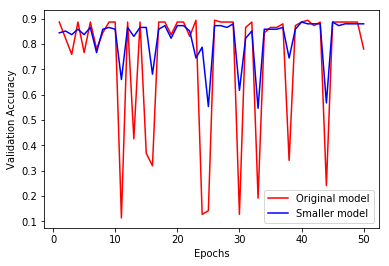

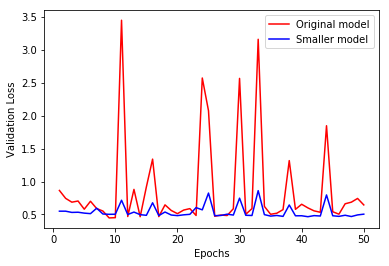

In [ ]:
original_dict = original_hist.history
smaller_dict = smaller_hist.history

original_val_acc = original_hist.history['val_accuracy']
smaller_val_acc = smaller_hist.history['val_accuracy']

original_val_loss = original_hist.history['val_loss']
smaller_val_loss = smaller_hist.history['val_loss']

epochs = range(1, len(original_val_acc)+1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, smaller_val_acc, 'b', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, smaller_val_loss, 'b', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

#### 여기서 볼 수 있듯이 작은 네트워크가 기본 네트워크보다 더 나중에 과대적합되기 시작했습니다.

#### 이번에는 문제에 필요한 것보다 훨씬 더 많은 용량을 가진 네트워크를 비교해 보겠습니다:

In [ ]:
bigger = models.Sequential()
bigger.add(Dense(1024, activation='relu', input_dim=17))
bigger.add(Dense(1024, activation='relu'))
bigger.add(Dense(1, activation='sigmoid'))

bigger.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [ ]:
bigger_hist = bigger.fit(X_train, y_train,
                        epochs=50,
                        batch_size=64,
                        validation_data=(X_test, y_test))

Train on 329 samples, validate on 141 samples
Epoch 1/50
329/329 [==============================] - 2s 5ms/sample - loss: 44.0977 - accuracy: 0.6201 - val_loss: 3.5718 - val_accuracy: 0.8865
Epoch 2/50
329/329 [==============================] - 0s 679us/sample - loss: 7.1076 - accuracy: 0.7386 - val_loss: 2.7507 - val_accuracy: 0.7943
Epoch 3/50
329/329 [==============================] - 0s 555us/sample - loss: 4.2023 - accuracy: 0.6778 - val_loss: 2.9225 - val_accuracy: 0.8865
Epoch 4/50
329/329 [==============================] - 0s 543us/sample - loss: 4.1864 - accuracy: 0.6991 - val_loss: 3.5707 - val_accuracy: 0.8865
Epoch 5/50
329/329 [==============================] - 0s 530us/sample - loss: 4.0829 - accuracy: 0.7416 - val_loss: 2.3195 - val_accuracy: 0.8227
Epoch 6/50
329/329 [==============================] - 0s 509us/sample - loss: 2.3396 - accuracy: 0.7964 - val_loss: 1.1021 - val_accuracy: 0.8865
Epoch 7/50
329/329 [==============================] - 0s 543us/sample - loss: 2

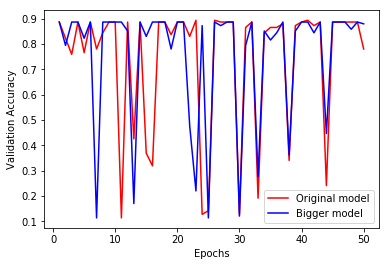

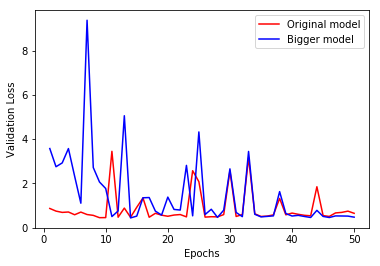

In [ ]:
bigger_dict = bigger_hist.history

bigger_val_acc = bigger_hist.history['val_accuracy']
bigger_val_loss = bigger_hist.history['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, bigger_val_acc, 'b', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, bigger_val_loss, 'b', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

#### 용량이 큰 네트워크는 거의 바로 과대적합이 시작되어 갈수록 더 심해집니다. 검증 손실도 매우 불안정합니다.

#### 다음은 두 네트워크의 훈련 손실에 대해 살펴보겠습니다.

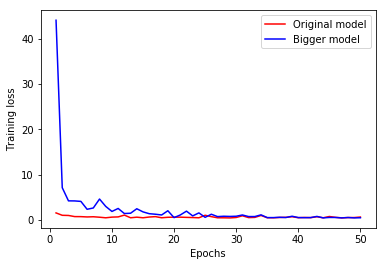

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_train_loss = bigger_hist.history['loss']

plt.plot(epochs, original_train_loss, 'r', label='Original model')
plt.plot(epochs, bigger_train_loss, 'b', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

여기서 볼 수 있듯이 용량이 큰 네트워크는 훈련 손실이 급격하게 0에 가까워집니다. 
용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링할 수 있습니다(결국 훈련 손실이 낮아집니다). 
하지만 더욱 과대적합에 민감해집니다(결국 훈련과 검증 손실 사이에 큰 차이가 발생합니다).

## 가중치 규제

* L1 규제 : 가중치의 절대값에 비례하는 비용이 추가됩니다.
* L2 규제 : 가중치의 제곱에 비례하는 비용이 추가됩니다. L2 규제는 신경망에서 가중치 감쇠라고도 부릅니다. 가중치 감쇠는 수학적으로 L2 규제와 동일합니다.

In [ ]:
from tensorflow.keras import regularizers

### L1(0.0001) 모델

In [ ]:
l1_model = models.Sequential()
l1_model.add(Dense(32, kernel_regularizer=regularizers.l1(0.0001), activation='relu', input_dim=17))
l1_model.add(Dense(32, kernel_regularizer=regularizers.l1(0.0001), activation='relu'))
l1_model.add(Dense(1, activation='sigmoid'))
             
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
l1_model_hist = l1_model.fit(X_train, y_train,
                             epochs=50,
                             batch_size=64,
                             validation_data=(X_test, y_test))

Train on 329 samples, validate on 141 samples
Epoch 1/50
329/329 [==============================] - 1s 4ms/sample - loss: 1.3419 - accuracy: 0.6657 - val_loss: 0.8610 - val_accuracy: 0.8014
Epoch 2/50
329/329 [==============================] - 0s 94us/sample - loss: 0.9739 - accuracy: 0.6991 - val_loss: 0.6370 - val_accuracy: 0.7943
Epoch 3/50
329/329 [==============================] - 0s 109us/sample - loss: 0.9101 - accuracy: 0.7386 - val_loss: 0.6416 - val_accuracy: 0.5816
Epoch 4/50
329/329 [==============================] - 0s 103us/sample - loss: 0.6217 - accuracy: 0.7386 - val_loss: 0.5600 - val_accuracy: 0.8865
Epoch 5/50
329/329 [==============================] - 0s 103us/sample - loss: 0.8616 - accuracy: 0.7204 - val_loss: 0.4306 - val_accuracy: 0.8511
Epoch 6/50
329/329 [==============================] - 0s 118us/sample - loss: 0.6392 - accuracy: 0.7508 - val_loss: 0.6656 - val_accuracy: 0.8865
Epoch 7/50
329/329 [==============================] - 0s 153us/sample - loss: 0.8

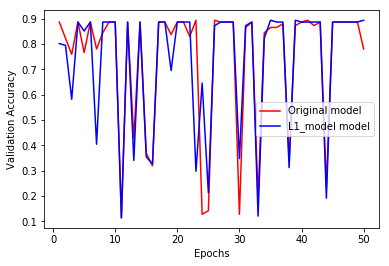

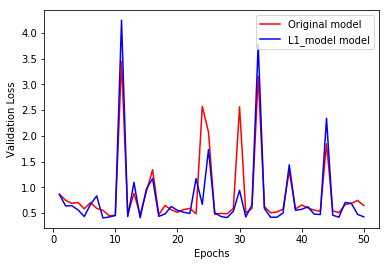

In [ ]:
l1_model_dict = l1_model_hist.history

l1_model_val_acc = l1_model_hist.history['val_accuracy']
l1_model_val_loss = l1_model_hist.history['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, l1_model_val_acc, 'b', label='L1_model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'b', label='L1_model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

### L2(0.001) 모델

In [ ]:
l2_model = models.Sequential()
l2_model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_dim=17))
l2_model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
l2_model_hist = l2_model.fit(X_train, y_train,
                             epochs=50,
                             batch_size=64,
                             validation_data=(X_test, y_test))

Train on 329 samples, validate on 141 samples
Epoch 1/50
329/329 [==============================] - 1s 4ms/sample - loss: 2.6743 - accuracy: 0.6292 - val_loss: 0.8239 - val_accuracy: 0.7660
Epoch 2/50
329/329 [==============================] - 0s 124us/sample - loss: 0.9501 - accuracy: 0.7052 - val_loss: 0.6827 - val_accuracy: 0.8652
Epoch 3/50
329/329 [==============================] - 0s 118us/sample - loss: 1.0638 - accuracy: 0.7204 - val_loss: 0.4979 - val_accuracy: 0.8298
Epoch 4/50
329/329 [==============================] - 0s 121us/sample - loss: 0.6234 - accuracy: 0.7599 - val_loss: 0.8745 - val_accuracy: 0.8865
Epoch 5/50
329/329 [==============================] - 0s 138us/sample - loss: 0.9802 - accuracy: 0.8359 - val_loss: 0.4886 - val_accuracy: 0.8794
Epoch 6/50
329/329 [==============================] - 0s 155us/sample - loss: 0.6617 - accuracy: 0.7994 - val_loss: 0.7590 - val_accuracy: 0.8865
Epoch 7/50
329/329 [==============================] - 0s 161us/sample - loss: 0.

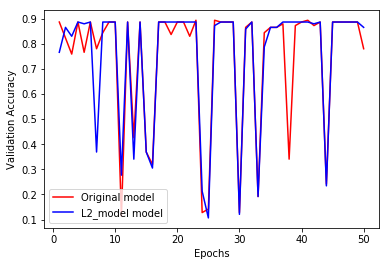

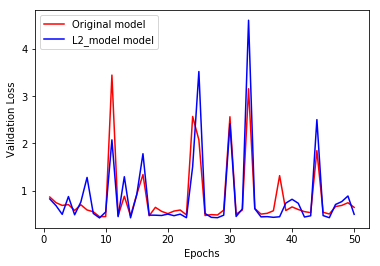

In [ ]:
l2_model_dict = l2_model_hist.history

l2_model_val_acc = l2_model_hist.history['val_accuracy']
l2_model_val_loss = l2_model_hist.history['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, l2_model_val_acc, 'b', label='L2_model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'b', label='L2_model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

### L1_L2(l1=0.0001, l2=0.0001)모델과 비교

In [ ]:
l1_l2_model = models.Sequential()
l1_l2_model.add(Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.001),
                          activation='relu', input_dim=17))
l1_l2_model.add(Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.001),
                          activation='relu'))
l1_l2_model.add(Dense(1, activation='sigmoid'))

l1_l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
l1_l2_model_hist = l1_l2_model.fit(X_train, y_train,
                             epochs=50,
                             batch_size=64,
                             validation_data=(X_test, y_test))

Train on 329 samples, validate on 141 samples
Epoch 1/50
329/329 [==============================] - 1s 4ms/sample - loss: 4.3475 - accuracy: 0.7781 - val_loss: 2.2511 - val_accuracy: 0.8723
Epoch 2/50
329/329 [==============================] - 0s 103us/sample - loss: 2.4636 - accuracy: 0.7538 - val_loss: 2.1282 - val_accuracy: 0.8865
Epoch 3/50
329/329 [==============================] - 0s 88us/sample - loss: 2.5156 - accuracy: 0.7568 - val_loss: 1.9321 - val_accuracy: 0.7447
Epoch 4/50
329/329 [==============================] - 0s 135us/sample - loss: 1.9640 - accuracy: 0.7599 - val_loss: 1.8835 - val_accuracy: 0.8865
Epoch 5/50
329/329 [==============================] - 0s 146us/sample - loss: 1.7333 - accuracy: 0.7933 - val_loss: 1.5431 - val_accuracy: 0.7872
Epoch 6/50
329/329 [==============================] - 0s 173us/sample - loss: 1.8588 - accuracy: 0.7842 - val_loss: 1.3584 - val_accuracy: 0.8440
Epoch 7/50
329/329 [==============================] - 0s 236us/sample - loss: 1.9

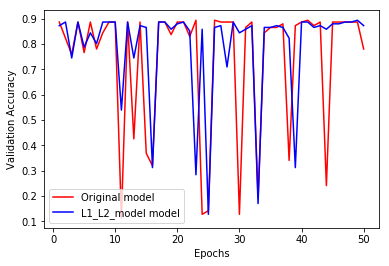

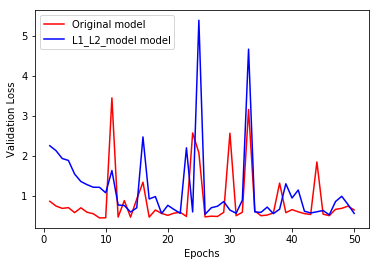

In [ ]:
l1_l2_model_dict = l1_l2_model_hist.history

l1_l2_model_val_acc = l1_l2_model_hist.history['val_accuracy']
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, l1_l2_model_val_acc, 'b', label='L1_L2_model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, l1_l2_model_val_loss, 'b', label='L1_L2_model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

### Dropout layer 추가

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(Dense(32, activation='relu', input_dim=17))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(32, activation='relu'))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
dpt_model_hist = dpt_model.fit(X_train, y_train,
                             epochs=50,
                             batch_size=64,
                             validation_data=(X_test, y_test))

Train on 329 samples, validate on 141 samples
Epoch 1/50
329/329 [==============================] - 1s 4ms/sample - loss: 12.3732 - accuracy: 0.7021 - val_loss: 2.9951 - val_accuracy: 0.8865
Epoch 2/50
329/329 [==============================] - 0s 114us/sample - loss: 9.1347 - accuracy: 0.6839 - val_loss: 2.8982 - val_accuracy: 0.8865
Epoch 3/50
329/329 [==============================] - 0s 142us/sample - loss: 7.8128 - accuracy: 0.7447 - val_loss: 2.6669 - val_accuracy: 0.8865
Epoch 4/50
329/329 [==============================] - 0s 158us/sample - loss: 7.2429 - accuracy: 0.7599 - val_loss: 2.4640 - val_accuracy: 0.8865
Epoch 5/50
329/329 [==============================] - 0s 151us/sample - loss: 7.3766 - accuracy: 0.7082 - val_loss: 2.1339 - val_accuracy: 0.8865
Epoch 6/50
329/329 [==============================] - 0s 136us/sample - loss: 7.1082 - accuracy: 0.7295 - val_loss: 1.9034 - val_accuracy: 0.8865
Epoch 7/50
329/329 [==============================] - 0s 133us/sample - loss: 7

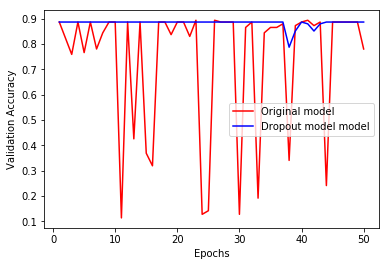

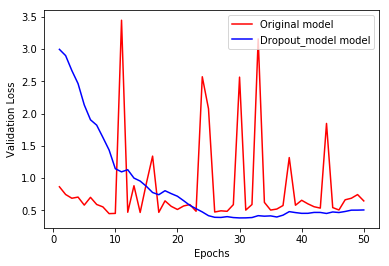

In [ ]:
dpt_model_dict = dpt_model_hist.history

dpt_model_val_acc = dpt_model_hist.history['val_accuracy']
dpt_model_val_loss = dpt_model_hist.history['val_loss']

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, original_val_acc, 'r', label='Original model')
plt.plot(epochs, dpt_model_val_acc, 'b', label='Dropout model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()

plt.plot(epochs, original_val_loss, 'r', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'b', label='Dropout_model model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()